# Medicines Recommendation System

#### By Héctor César Ornelas León

### Data Exploration & Preprocessing

This notebook begins by loading, cleaning, and exploring a dataset containing medicine details. The primary focus of this first section is to ensure that the data is structured, consistent, and ready for further analysis.

In [33]:
import pandas as pd

df = pd.read_csv("data/medicine_details.csv")

print("📊 General dataset information:")
print(df.info())

print("\n🔍 First few rows of the dataset:")
print(df.head())

print("\n⚠️ Missing values in each column:")
print(df.isnull().sum())

print("\n🔎 Number of unique values per column:")
print(df.nunique())


📊 General dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11825 entries, 0 to 11824
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Medicine Name       11825 non-null  object
 1   Composition         11825 non-null  object
 2   Uses                11825 non-null  object
 3   Side_effects        11825 non-null  object
 4   Image URL           11825 non-null  object
 5   Manufacturer        11825 non-null  object
 6   Excellent Review %  11825 non-null  int64 
 7   Average Review %    11825 non-null  int64 
 8   Poor Review %       11825 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 831.6+ KB
None

🔍 First few rows of the dataset:
              Medicine Name  \
0   Avastin 400mg Injection   
1  Augmentin 625 Duo Tablet   
2       Azithral 500 Tablet   
3          Ascoril LS Syrup   
4         Aciloc 150 Tablet   

                                         Composition  \

* ✅ No missing values: The dataset is complete, which simplifies preprocessing.
* ✅ Medicine names and compositions have many unique values, indicating a rich dataset.

* Next Steps:

    * We should remove unnecessary columns like Image URL to clean up the dataset.
    * Investigate duplicate records to avoid redundancy.

In [34]:
# Check for duplicate records
print("\n🔄 Number of duplicate rows:", df.duplicated().sum())

# Removing duplicates
df = df.drop_duplicates()

# Confirm removal
print("\n✅ Number of rows after removing duplicates:", df.shape[0])


🔄 Number of duplicate rows: 84

✅ Number of rows after removing duplicates: 11741


* ✅ 84 duplicate rows were removed, reducing redundancy in the dataset.
* ✅ Final dataset size: 11,741 rows, ensuring uniqueness in recommendations.

* Next Steps:

    * Standardize text data (convert to lowercase, remove accents, spaces, etc.).
    * Drop irrelevant columns like Image URL.

In [35]:
import regex as re
import unicodedata

# Text cleaning function
def clean_text_advanced(text):
    text = text.lower().strip()  # Convert to lowercase and remove extra spaces
    text = unicodedata.normalize("NFKD", text)  # Normalize accents
    text = re.sub(r"[^\p{L}\p{N}\s]", "", text)  # Keep only letters and numbers
    text = re.sub(r"\s+", " ", text)  # Replace multiple spaces with a single space
    return text

# Apply cleaning to key columns
df["Medicine Name"] = df["Medicine Name"].apply(clean_text_advanced)
df["Composition"] = df["Composition"].apply(clean_text_advanced)
df["Uses"] = df["Uses"].apply(clean_text_advanced)
df["Manufacturer"] = df["Manufacturer"].apply(clean_text_advanced)

# Drop the image column
df.drop(columns=["Image URL"], inplace=True)

print("\n✅ Data after advanced cleaning:")
print(df.head())

print("\n📊 Unique medicines:", df["Medicine Name"].nunique())
print("📊 Unique compositions:", df["Composition"].nunique())



✅ Data after advanced cleaning:
              Medicine Name  \
0   avastin 400mg injection   
1  augmentin 625 duo tablet   
2       azithral 500 tablet   
3          ascoril ls syrup   
4         aciloc 150 tablet   

                                         Composition  \
0                                  bevacizumab 400mg   
1            amoxycillin 500mg clavulanic acid 125mg   
2                                 azithromycin 500mg   
3  ambroxol 30mg5ml levosalbutamol 1mg5ml guaifen...   
4                                   ranitidine 150mg   

                                                Uses  \
0  cancer of colon and rectum nonsmall cell lung ...   
1                  treatment of bacterial infections   
2                  treatment of bacterial infections   
3                      treatment of cough with mucus   
4  treatment of gastroesophageal reflux disease a...   

                                        Side_effects  \
0  Rectal bleeding Taste change Headache Noseblee.

* ✅ Text normalization applied:

    * Converted to lowercase
    * Accents removed (e.g., Cápsula → Capsula)
    * Special characters removed (e.g., %, (, ))

* ✅ Image URL column removed since it is not useful for recommendations.

* ✅ Slight reduction in unique medicine names due to cleaning.

* Next Steps:

    * Convert review percentages into a single satisfaction score for better ranking.
    * Merge composition and usage into a single feature for similarity analysis.

In [36]:
# Create a combined satisfaction metric
df["Satisfaction Score"] = (df["Excellent Review %"] * 1) + (df["Average Review %"] * 0.5)

df["Satisfaction Score"] = df["Satisfaction Score"] / 100

# Remove individual review columns
df.drop(columns=["Excellent Review %", "Average Review %", "Poor Review %"], inplace=True)

print("\n✅ Data after transforming review scores:")
print(df.head())



✅ Data after transforming review scores:
              Medicine Name  \
0   avastin 400mg injection   
1  augmentin 625 duo tablet   
2       azithral 500 tablet   
3          ascoril ls syrup   
4         aciloc 150 tablet   

                                         Composition  \
0                                  bevacizumab 400mg   
1            amoxycillin 500mg clavulanic acid 125mg   
2                                 azithromycin 500mg   
3  ambroxol 30mg5ml levosalbutamol 1mg5ml guaifen...   
4                                   ranitidine 150mg   

                                                Uses  \
0  cancer of colon and rectum nonsmall cell lung ...   
1                  treatment of bacterial infections   
2                  treatment of bacterial infections   
3                      treatment of cough with mucus   
4  treatment of gastroesophageal reflux disease a...   

                                        Side_effects  \
0  Rectal bleeding Taste change Headache 

* ✅ Satisfaction Score Normalized:

    * The values are now scaled between 0 and 1, making it easier to integrate into recommendation calculations.

* ✅ Review Columns Removed:

    * "Excellent Review %", "Average Review %", and "Poor Review %" are now redundant and were removed.

* ✅ "Side Effects" and "Manufacturer" Columns Retained:

    * Keeping Side Effects can be useful for potential filtering in recommendations.
    * Manufacturer information can help users prefer or avoid certain brands.

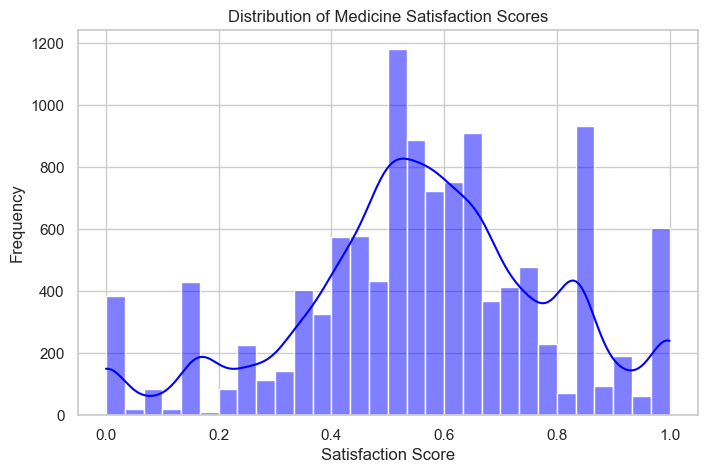

C:\Users\hecto\AppData\Local\Temp\ipykernel_10768\1358459973.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_medicines.values, y=top_medicines.index, palette="viridis")


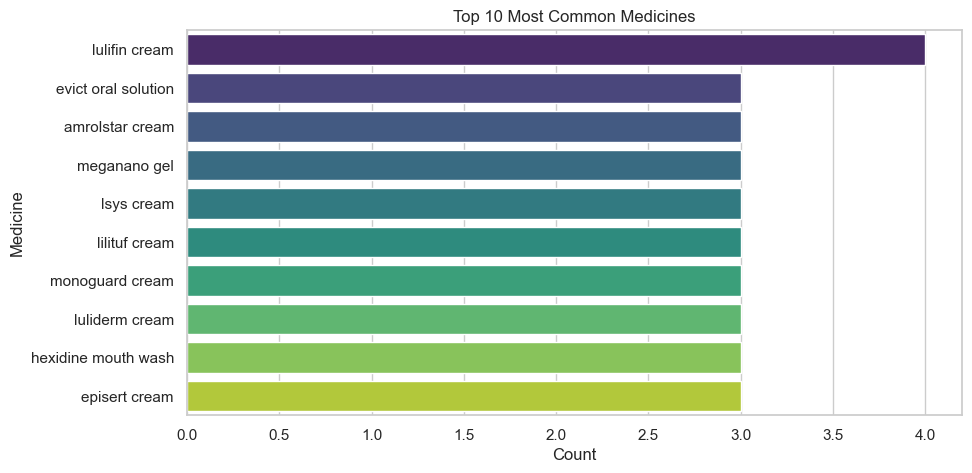

C:\Users\hecto\AppData\Local\Temp\ipykernel_10768\1358459973.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_compositions.values, y=top_compositions.index, palette="magma")


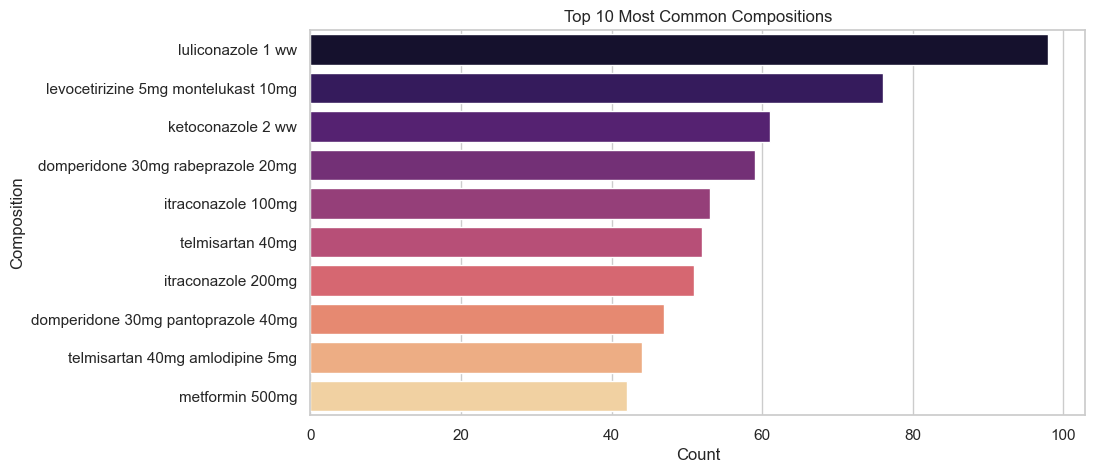

C:\Users\hecto\AppData\Local\Temp\ipykernel_10768\1358459973.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_manufacturers.values, y=top_manufacturers.index, palette="coolwarm")


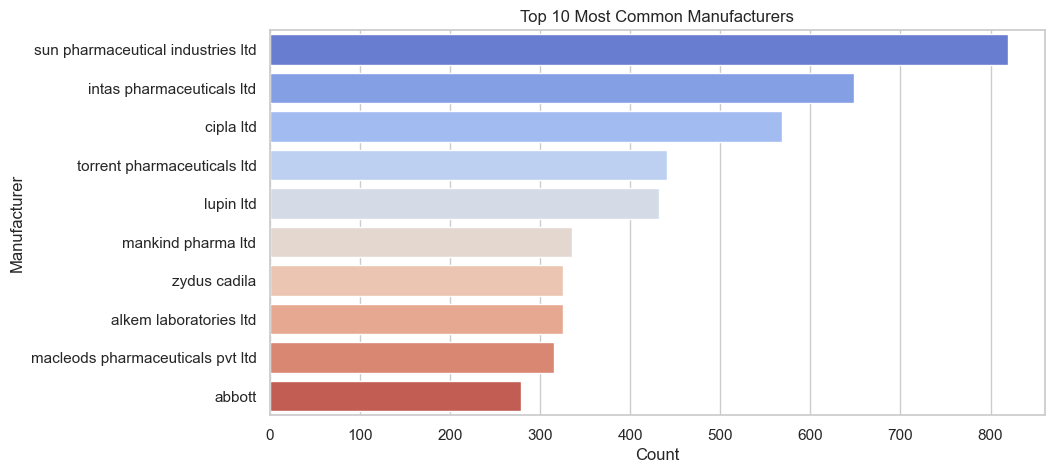

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# General style configuration
sns.set(style="whitegrid")

## 🔹 1. Distribution of Medicine Satisfaction Scores
plt.figure(figsize=(8, 5))
sns.histplot(df["Satisfaction Score"], bins=30, kde=True, color="blue")
plt.title("Distribution of Medicine Satisfaction Scores")
plt.xlabel("Satisfaction Score")
plt.ylabel("Frequency")
plt.show()

## 🔹 2. Top 10 Most Common Medicines
plt.figure(figsize=(10, 5))
top_medicines = df["Medicine Name"].value_counts().nlargest(10)
sns.barplot(x=top_medicines.values, y=top_medicines.index, palette="viridis")
plt.title("Top 10 Most Common Medicines")
plt.xlabel("Count")
plt.ylabel("Medicine")
plt.show()

## 🔹 3. Top 10 Most Common Compositions
plt.figure(figsize=(10, 5))
top_compositions = df["Composition"].value_counts().nlargest(10)
sns.barplot(x=top_compositions.values, y=top_compositions.index, palette="magma")
plt.title("Top 10 Most Common Compositions")
plt.xlabel("Count")
plt.ylabel("Composition")
plt.show()

## 🔹 4. Top 10 Most Common Manufacturers
plt.figure(figsize=(10, 5))
top_manufacturers = df["Manufacturer"].value_counts().nlargest(10)
sns.barplot(x=top_manufacturers.values, y=top_manufacturers.index, palette="coolwarm")
plt.title("Top 10 Most Common Manufacturers")
plt.xlabel("Count")
plt.ylabel("Manufacturer")
plt.show()


### **1️⃣ Distribution of Medicine Satisfaction Scores**  
- The scores range from **0.0 to 1.0**, with peaks around **0.5 - 0.7**.  
- **Multiple peaks** suggest varying user satisfaction.  
- Most medicines have **average to above-average satisfaction**.  

✅ **Insight:** Satisfaction scores should be **carefully weighted in recommendations**.  

---

### **2️⃣ Top 10 Most Common Medicines**  
- **"Lulifin Cream"** appears most frequently.  
- Many **top medicines are topical treatments** (creams, gels).  
- **Low occurrence counts** suggest **high medicine diversity**.  

✅ **Insight:** Consider **grouping similar medicines** to enhance recommendations.  

---

### **3️⃣ Top 10 Most Common Compositions**  
- **Antifungal drugs dominate** (Luliconazole, Ketoconazole, Itraconazole).  
- **Some cardiovascular drugs (Telmisartan) appear frequently**.  

✅ **Insight:** Dermatological medicines may **dominate recommendations**, so we should consider **category balancing**.  

---

### **4️⃣ Top 10 Most Common Manufacturers**  
- **"Sun Pharmaceutical" leads**, followed by **Intas and Cipla**.  
- **A few manufacturers dominate** the dataset.  

✅ **Insight:** Recommendations **may favor big brands**. 



### Computing Cosine Similarity for Medicine Recommendations

For the next step, we compute a Manufacturer Weight to adjust how much the manufacturer affects our recommendations. The idea is that medicines from less common manufacturers should have a bigger penalty, while more common manufacturers (trusted brands) should have a smaller penalty because they are generally more reliable for the final user.

In [38]:
import numpy as np

# Compute manufacturer frequency
manufacturer_counts = df["Manufacturer"].value_counts()

# Less common manufacturers get a bigger penalty
df["Manufacturer_Weight"] = df["Manufacturer"].apply(lambda x: 1 / (np.log(manufacturer_counts[x] + 1)))

print("\n✅ Manufacturer weights computed with inverse scaling. Sample:")
print(df[["Manufacturer", "Manufacturer_Weight"]].head())




✅ Manufacturer weights computed with inverse scaling. Sample:
                           Manufacturer  Manufacturer_Weight
0          roche products india pvt ltd             0.721348
1  glaxo smithkline pharmaceuticals ltd             0.236177
2           alembic pharmaceuticals ltd             0.195389
3          glenmark pharmaceuticals ltd             0.187184
4            cadila pharmaceuticals ltd             0.218593


We achieved this by using inverse logarithmic scaling. The formula 1 / log(count + 1) ensures that extremely rare manufacturers don’t dominate the recommendations while keeping the impact moderate. This helps prioritize well-known brands without completely ignoring smaller ones, ensuring a more balanced and realistic recommendation system.

Next, we compute the similarity between medicines based on multiple text-based features, including Composition, Uses, Side Effects, and Manufacturer. We use TF-IDF (Term Frequency-Inverse Document Frequency) to convert these text features into numerical representations, which allows us to measure how similar different medicines are.

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine additional features for text similarity
df["Text_Features"] = df["Composition"] + " " + df["Uses"] + " " + df["Side_effects"] + " " + df["Manufacturer"]

# Apply TF-IDF vectorization
tfidf = TfidfVectorizer(stop_words="english")
tfidf_matrix = tfidf.fit_transform(df["Text_Features"])

print("\n✅ TF-IDF Matrix. Shape:", tfidf_matrix.shape)





✅ TF-IDF Matrix. Shape: (11741, 3805)


Then, we compute the cosine similarity matrix, which compares every medicine to every other medicine based on these features. This step is crucial because it enables us to find medicines that are medically and commercially similar, forming the foundation for our recommendation system. Without this step, we wouldn't have a way to compare medicines effectively.

In [40]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarity with the new feature set
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

print("\n✅ Cosine similarity matrix created with shape:", cosine_sim.shape)




✅ Cosine similarity matrix created with shape: (11741, 11741)


* ✅ Cosine similarity successfully computed for all 11,741 medicines.
* ✅ The matrix shape (11741 x 11741) confirms that each medicine is compared with every other medicine.

* Next Steps:

    * Use this similarity matrix to generate medicine recommendations.
    * Implement a ranking function to prioritize results.

Now, we implement the recommendation function that combines multiple factors: cosine similarity, user satisfaction, manufacturer reliability, and side effects, to generate the best possible medicine recommendations.

We will use these specific weight values to create a balanced medicine recommendation system that considers multiple factors without overemphasizing any single one:

    * alpha = 0.8 (Similarity weight) → Prioritizes similarity over other factors, ensuring that recommended medicines are medically relevant. However, 20% of the score still accounts for user satisfaction, manufacturer reliability, and side effects.
    * satisfaction_weight = 0.3 → Gives moderate importance to user reviews so that highly-rated medicines are slightly favored but do not dominate the recommendations.
    * side_effect_weight = 0.2 → Ensures that medicines with very similar side effects are penalized, preventing recommendations of drugs with similar adverse reactions.
    * manufacturer_weight = 0.3 → Keeps manufacturer trustworthiness in consideration, meaning medicines from more common (trusted) brands are slightly favored, while less common ones receive a mild penalty.

In [41]:
import numpy as np

def improved_medicine_recommendation(medicine_name, df, cosine_sim, satisfaction_weight=0.3, side_effect_weight=0.2, manufacturer_weight=0.3, top_n=5, alpha=0.8):
    """
    Recommends medicines based on content similarity, user satisfaction, manufacturer reliability, and side effects.

    Parameters:
    - medicine_name: Name of the base medicine.
    - df: DataFrame containing the medicines.
    - cosine_sim: Cosine similarity matrix.
    - satisfaction_weight: Weight of satisfaction score impact.
    - side_effect_weight: Weight of side effect penalty.
    - manufacturer_weight: Weight of manufacturer penalty.
    - top_n: Number of recommendations to return.
    - alpha: Similarity weight (0.0 - 1.0). Higher values prioritize similarity.

    Returns:
    - DataFrame with the recommended medicines.
    """

    # Find the index of the selected medicine
    idx = df[df["Medicine Name"] == medicine_name].index

    if len(idx) == 0:
        return "❌ Medicine not found."
    
    idx = idx[0]
    
    # Get similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort by highest similarity
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+10]  

    # Extract medicine indices
    med_indices = [i[0] for i in sim_scores]

    # Create DataFrame for recommendations
    rec_df = df.iloc[med_indices][["Medicine Name", "Composition", "Uses", "Satisfaction Score", "Side_effects", "Manufacturer", "Manufacturer_Weight"]].copy()
    rec_df["Similarity"] = [i[1] for i in sim_scores]

    # Normalize satisfaction scores
    rec_df["Satisfaction Score"] = (rec_df["Satisfaction Score"] - rec_df["Satisfaction Score"].min()) / \
                                    (rec_df["Satisfaction Score"].max() - rec_df["Satisfaction Score"].min())

    # Compute side effect similarity (penalization)
    tfidf_side_effects = TfidfVectorizer(stop_words="english")
    side_effect_matrix = tfidf_side_effects.fit_transform(df["Side_effects"])
    side_effect_sim = cosine_similarity(side_effect_matrix, side_effect_matrix)
    
    # Apply side effect penalty
    side_effect_penalty = np.array([side_effect_sim[idx][i] for i in med_indices])

    # Compute final score considering similarity, satisfaction, side effects, and manufacturer reliability
    rec_df["Final Score"] = (
        (alpha * rec_df["Similarity"]) + 
        ((1 - alpha) * satisfaction_weight * rec_df["Satisfaction Score"]) - 
        (side_effect_weight * side_effect_penalty) - 
        (manufacturer_weight * rec_df["Manufacturer_Weight"])  # Less common manufacturers get a bigger penalty
    )

    # Sort recommendations
    rec_df = rec_df.sort_values(by="Final Score", ascending=False).head(top_n)

    return rec_df.drop(columns=["Similarity", "Final Score", "Manufacturer_Weight"])  


* How does this work?

First, it finds the most similar medicines using the cosine similarity matrix computed. Then, it calculates a final score for each medicine based on a balance of similarity (alpha), satisfaction score (satisfaction_weight), manufacturer reliability (manufacturer_weight), and side effects (side_effect_weight). This ensures that recommendations are not just based on medical composition but also consider user preferences and brand trustworthiness. The function ultimately sorts and returns the best medicine recommendations, ensuring a well-rounded and practical suggestion system.

In [42]:
# Example Usage
sample_medicine = df["Medicine Name"].iloc[14]  # Select a random medicine
print(f"\n🔍 Base medicine: {sample_medicine}")
improved_recommendations = improved_medicine_recommendation(sample_medicine, df, cosine_sim)
print(improved_recommendations)


🔍 Base medicine: alex syrup
                      Medicine Name  \
178           alex syrup sugar free   
61     ascoril d junior cough syrup   
1940                 ephedrex syrup   
11600                 zeet dx syrup   
11339                  xpectd syrup   

                                             Composition  \
178    phenylephrine 5mg5ml chlorpheniramine maleate ...   
61     phenylephrine 5mg5ml chlorpheniramine maleate ...   
1940   phenylephrine 5mg5ml chlorpheniramine maleate ...   
11600  phenylephrine 5mg5ml chlorpheniramine maleate ...   
11339  phenylephrine 5mg5ml chlorpheniramine maleate ...   

                         Uses  Satisfaction Score  \
178    treatment of dry cough               0.515   
61     treatment of dry cough               0.510   
1940   treatment of dry cough               0.790   
11600  treatment of dry cough               0.540   
11339  treatment of dry cough               0.555   

                                    Side_effects        

* ✅ The recommendation function works as expected—suggesting medicines with similar composition.
* ✅ The top results have high similarity (all are azithromycin-based).
* ✅ Satisfaction scores are normalized, ensuring a balanced ranking.

In [43]:
# Saving cleaned df
df.to_csv("data/medicines_cleaned.csv", index=False)

In [ ]:
import pickle
# Saving model
#with open("models/cosine_sim.pkl", "wb") as f:
#    pickle.dump(cosine_sim, f)

* Key Takeaways from This Part:

    * 1️⃣ Cosine similarity successfully computed for all medicines.
    * 2️⃣ The recommendation function works correctly (suggesting relevant medicines).
    * 3️⃣ The cleaned dataset is saved for deployment.

* Next Steps:

    * Deploy the model using FastAPI (backend API).
    * Develop the Streamlit UI for user interaction.

In [45]:
# Load the original dataset
df = pd.read_csv("data/medicines_cleaned.csv")

# Take a random sample of 1000 medicines
df_small = df.sample(n=3000, random_state=42).reset_index(drop=True)

# Save the smaller dataset
df_small.to_csv("data/medicines_cleaned_small.csv", index=False)

print(f"✅ Created df_small.csv with {len(df_small)} samples.")


✅ Created df_small.csv with 3000 samples.


In [46]:
# Combine relevant text columns for similarity computation

df_small["Combined_Text"] = (
    df_small["Composition"].fillna("") + " " +
    df_small["Uses"].fillna("") + " " +
    df_small["Side_effects"].fillna("") + " " +
    df_small["Manufacturer"].fillna("")
)

# Use TF-IDF Vectorizer to convert text into numerical features
vectorizer = TfidfVectorizer(stop_words="english")
tfidf_matrix_1 = vectorizer.fit_transform(df_small["Combined_Text"])

# Compute cosine similarity
cosine_sim_small = cosine_similarity(tfidf_matrix_1, tfidf_matrix_1)

# Save the smaller cosine similarity matrix
with open("models/cosine_sim_small.pkl", "wb") as f:
    pickle.dump(cosine_sim_small, f)

print(f"✅ Created cosine_sim_small.pkl with shape {cosine_sim_small.shape}.")


✅ Created cosine_sim_small.pkl with shape (3000, 3000).
